Autoencoder tutorial with actual code and visualization for autoencoder based reconstruction and noise removal

In [7]:
# simple example
from keras.datasets import mnist
import numpy as np

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [10]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [11]:
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [15]:
# normalization of data and reshaping
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [16]:
# train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2796 - val_loss: 0.1901
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1715 - val_loss: 0.1542
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1448 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1289 - val_loss: 0.1217
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1187 - val_loss: 0.1135
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1118 - val_loss: 0.1077
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1068 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1032 - val_loss: 0.1005
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1005 - val_loss: 0.0983
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0987 - val_loss: 0.09

In [17]:
# encode/decode images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

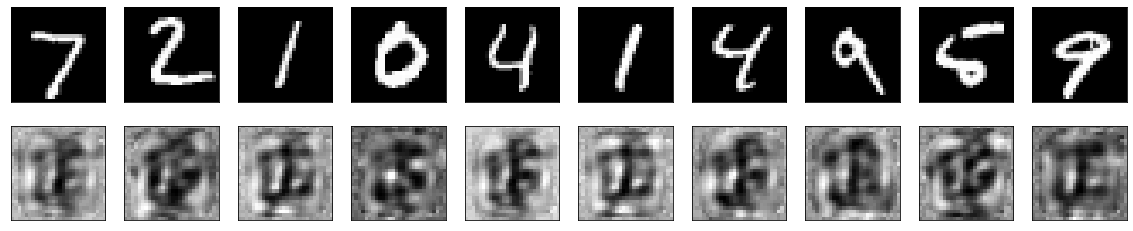

In [18]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

Deep Autoencoders

In [20]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [21]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2464 - val_loss: 0.1644
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1475 - val_loss: 0.1347
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1301 - val_loss: 0.1235
Epoch 4/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1206 - val_loss: 0.1161
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1153 - val_loss: 0.1114
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1112 - val_loss: 0.1083
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1085 - val_loss: 0.1060
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1058 - val_loss: 0.1033
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1034 - val_loss: 0.1012
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.101

Convolutional autoencoders

In [22]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [33]:
%load_ext tensorboard
%tensorboard --logdir="/tmp/autoencoder"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1068), started 1:34:18 ago. (Use '!kill 1068' to kill it.)

In [25]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
  1/469 [..............................] - ETA: 0s - loss: 0.6781WARNING:tensorflow:From C:\Users\MChirara\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 64s 137ms/step - loss: 0.2113 - val_loss: 0.1510
Epoch 2/50
469/469 [==============================] - 64s 137ms/step - loss: 0.1409 - val_loss: 0.1321
Epoch 3/50
469/469 [==============================] - 60s 127ms/step - loss: 0.1269 - val_loss: 0.1211
Epoch 4/50
469/469 [==============================] - 56s 119ms/step - loss: 0.1184 - val_loss: 0.1143
Epoch 5/50
469/469 [==============================] - 46s 99ms/step - loss: 0.1134 - val_loss: 0.1118
Epoch 6/50
469/469 [==============================] - 41s 88ms/step - loss: 0.1101 - val_loss: 0.1076
Epoch 7/50
469/469 [==============

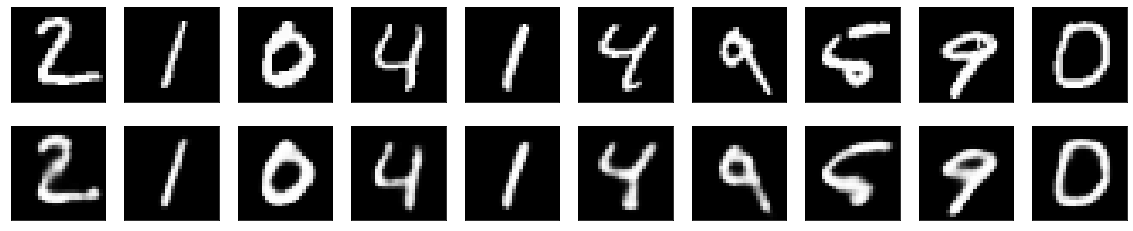

In [27]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

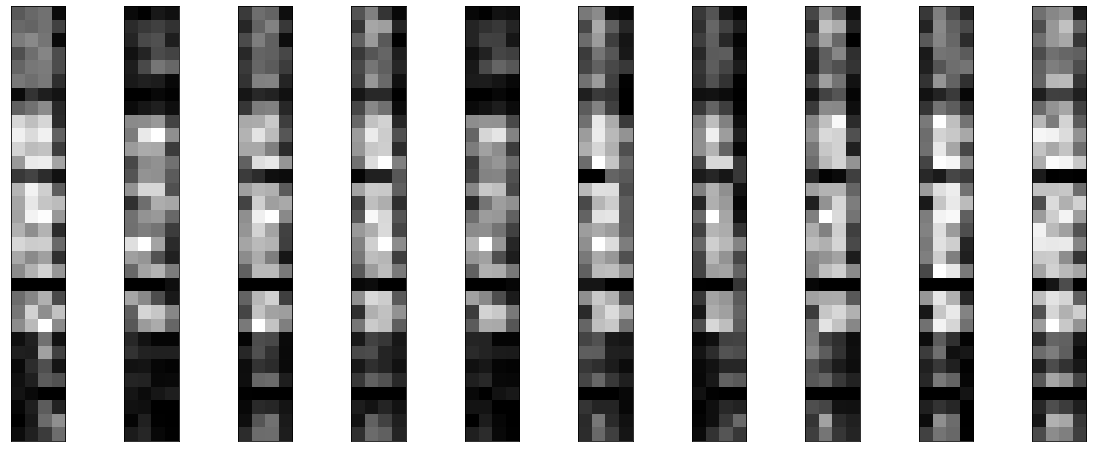

In [28]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Image Denoising

In [29]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
## add noise to immages
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

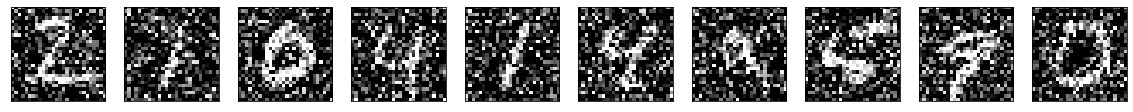

In [30]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [34]:
# build conv autoencoder to denoise
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 102s 218ms/step - loss: 0.1647 - val_loss: 0.1154
Epoch 2/100
469/469 [==============================] - 106s 225ms/step - loss: 0.1128 - val_loss: 0.1088
Epoch 3/100
469/469 [==============================] - 105s 225ms/step - loss: 0.1080 - val_loss: 0.1064
Epoch 4/100
469/469 [==============================] - 124s 264ms/step - loss: 0.1052 - val_loss: 0.1030
Epoch 5/100
469/469 [==============================] - 109s 232ms/step - loss: 0.1032 - val_loss: 0.1014
Epoch 6/100
469/469 [==============================] - 117s 249ms/step - loss: 0.1018 - val_loss: 0.1004
Epoch 7/100
469/469 [==============================] - 124s 265ms/step - loss: 0.1008 - val_loss: 0.0996
Epoch 8/100
469/469 [==============================] - 121s 258ms/step - loss: 0.0999 - val_loss: 0.0992
Epoch 9/100
469/469 [==============================] - 122s 261ms/step - loss: 0.0992 - val_loss: 0.0986
Epoch 10/100
469/469 [==============================] -